# What I found About the data in this Notebook:
1. Data doesn't have any missing values
2. Data is not correlated with each other nor with **target**

## What does this notebook cover:
1. EDA
2. Size reduction of dataframe
3. Tried LightAutoML

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
test_df= pd.read_csv('/kaggle/input/tabular-playground-series-nov-2021/test.csv')
sub_df = pd.read_csv('/kaggle/input/tabular-playground-series-nov-2021/sample_submission.csv')
df= pd.read_csv('/kaggle/input/tabular-playground-series-nov-2021/train.csv')
display(df.sample(5))
print('shape of training dataset: ',df.shape)
print('shape of test dataset:     ',test_df.shape)
print('shape of sub sample:       ',sub_df.shape)

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
40229,40229,0.043874,3.870290,81.0750,1.27746,0.073269,-0.169327,2.25872,0.272658,1.943880,...,5.168780,0.018041,0.031874,-0.001507,0.580209,1.70655,2.46936,0.016619,0.112340,1
150493,150493,0.628882,2.200090,74.7076,2.20997,0.073700,1.066770,3.43925,2.534660,4.273340,...,1.583220,0.112690,0.055127,0.056681,0.031218,2.95988,1.60725,0.017734,0.043912,1
68319,68319,0.124367,0.783837,-93.8099,3.74499,0.060641,1.637780,4.46930,4.756150,0.977533,...,1.958040,0.093693,0.010172,-0.009081,0.049928,1.53776,3.06301,0.060901,-0.018609,0
157038,157038,0.020494,1.180830,174.6330,3.31672,0.069465,-0.127294,4.66956,1.442100,0.381781,...,-0.208274,0.114981,0.036981,0.119751,0.118227,1.72770,1.52316,0.086512,0.035213,1
296643,296643,0.881349,4.413680,-112.9290,2.18684,0.042919,3.149900,4.02796,2.189260,4.192690,...,2.726620,0.044606,0.060242,-0.046395,0.050635,4.26105,4.20768,0.092887,0.025414,1


shape of training dataset:  (600000, 102)
shape of test dataset:      (540000, 101)
shape of sub sample:        (540000, 2)


## lets check the **distribution of target** feature

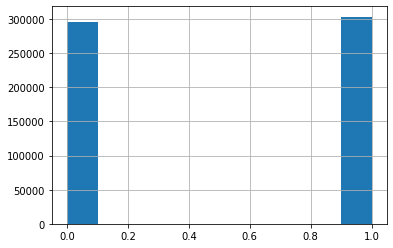

In [4]:
df.target.hist();

Target is almost equally distributed!!!

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,600000.0,299999.500000,173205.225094,0.000000,149999.750000,299999.500000,449999.250000,599999.000000
f0,600000.0,0.306508,0.522450,-3.797450,0.026222,0.097788,0.397184,8.781500
f1,600000.0,2.497590,1.554018,-1.223960,1.186238,2.516500,3.787630,6.226720
f2,600000.0,306.644536,551.743893,-1842.530000,43.573400,133.626000,302.262250,6119.280000
f3,600000.0,2.647901,1.544529,-1.368560,1.442028,2.634130,3.907640,6.521150
f4,600000.0,0.177850,0.417488,-3.206210,0.019709,0.061586,0.112712,8.265470
f5,600000.0,2.556832,1.562527,-1.169770,1.261038,2.590425,3.813662,6.515070
f6,600000.0,2.699650,1.564000,-1.059310,1.385820,2.801255,3.996913,6.586780
f7,600000.0,2.571593,1.549361,-1.281970,1.333848,2.557985,3.823450,6.258770
f8,600000.0,2.538273,1.532988,-1.242020,1.292163,2.475880,3.804360,6.389670


## Observation
1. All feature have -ve value in min except target and id.
2. Mean is mostly in single digit for all features with 2 exceptions (f2: 306 & f35: 55)
3. STD is mostly single digit or less except f2 and f35

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 102 entries, id to target
dtypes: float64(100), int64(2)
memory usage: 466.9 MB


<AxesSubplot:>

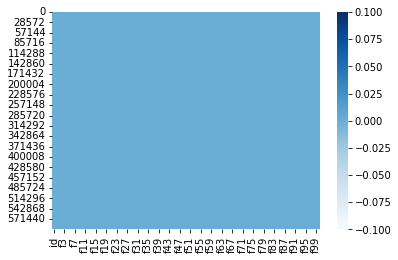

In [20]:
sns.heatmap(df.isnull(), cmap='Blues')

We don't having any missing data

## Reducing memory usage on disk/Ram

In [21]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [22]:
df = reduce_mem_usage(df)
test_df = reduce_mem_usage(test_df)

Memory usage of dataframe is 466.92 MB
Memory usage after optimization is: 117.30 MB
Decreased by 74.9%
Memory usage of dataframe is 416.11 MB
Memory usage after optimization is: 105.06 MB
Decreased by 74.8%


# Visualizing the data

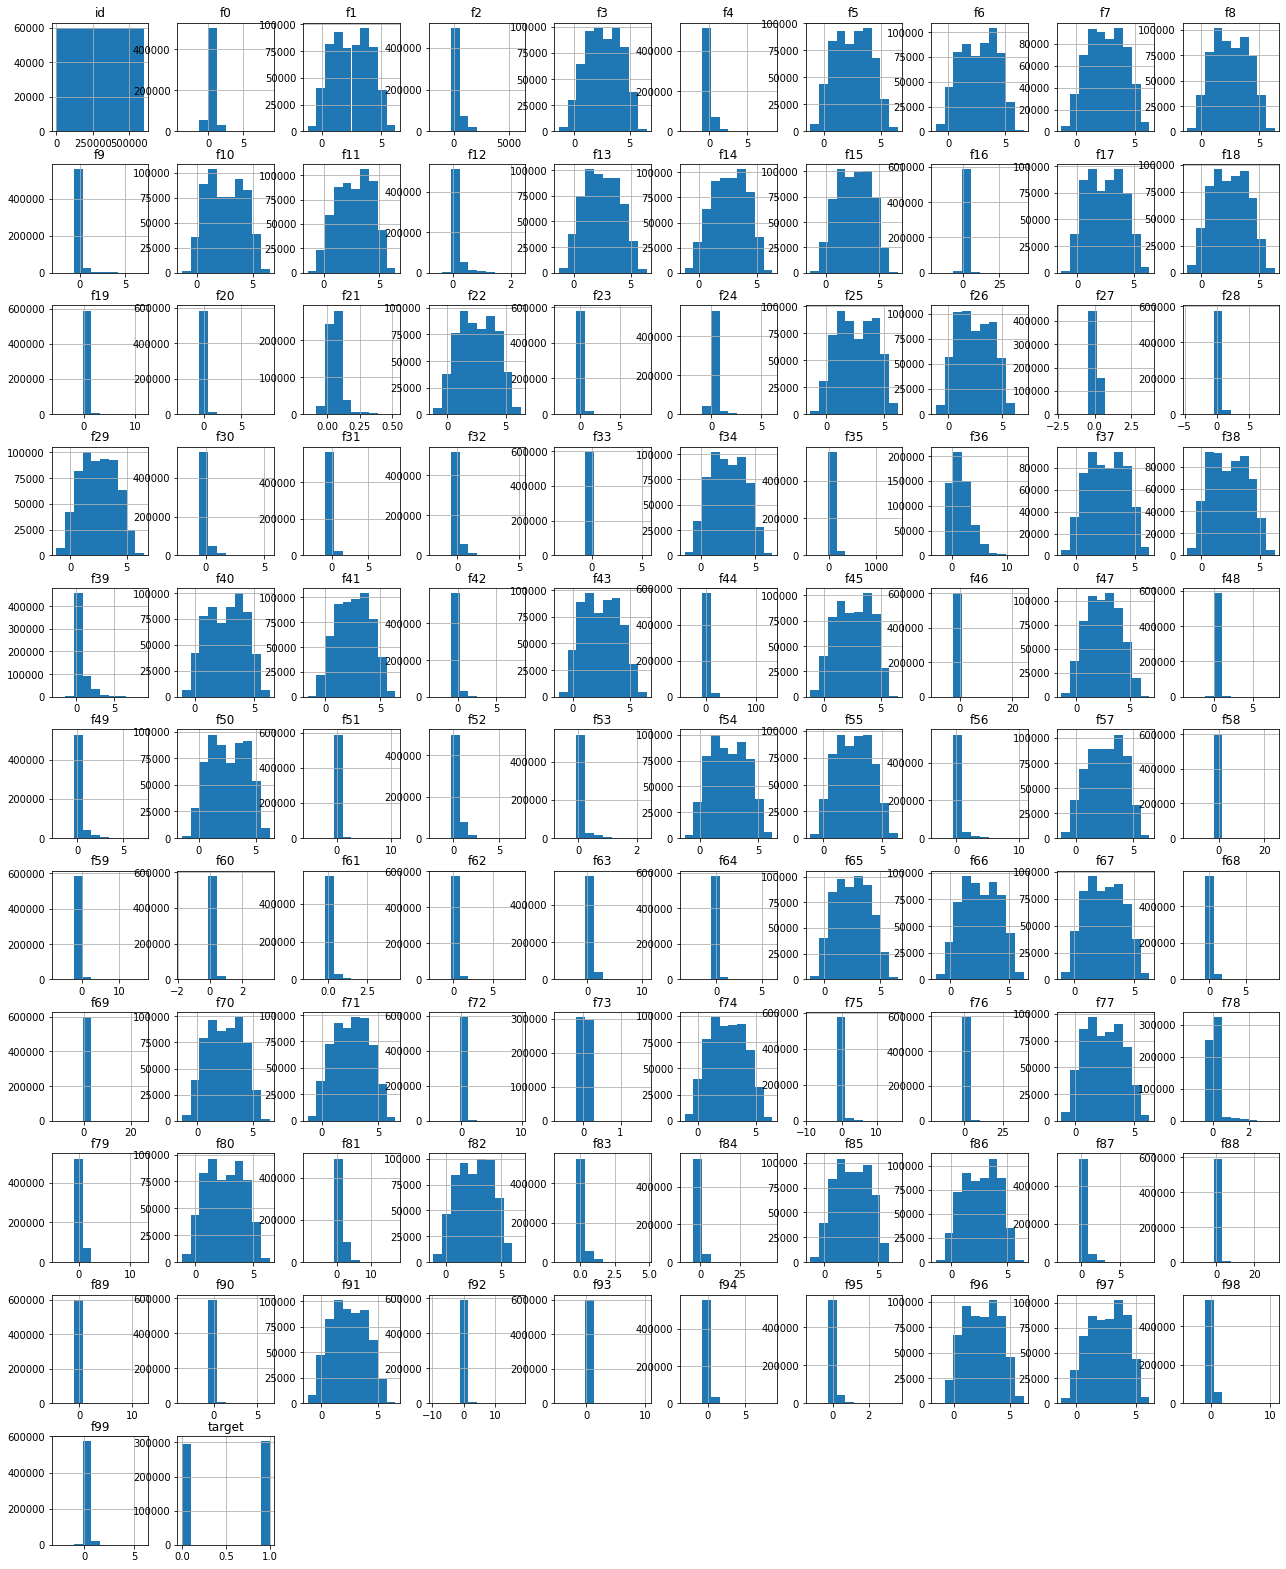

CPU times: user 18.9 s, sys: 365 ms, total: 19.2 s
Wall time: 19 s


In [31]:
%%time
df.hist(figsize=(22,28))
plt.show()

In [34]:
%%time
df.corr()

CPU times: user 17.2 s, sys: 108 ms, total: 17.3 s
Wall time: 17.3 s


,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
id,1.000000,-0.019128,-0.000610,0.049249,-0.024055,-0.042858,0.101671,-0.000429,0.068104,-0.036949,-0.049080,0.033261,0.039061,-0.030368,0.043642,-0.074552,0.001619,-0.006087,0.038541,-0.020099,0.003576,0.003266,-0.030267,0.008106,-6.575483e-02,0.061146,-0.042891,0.001017,0.086378,0.020766,0.046552,-0.017292,-0.028429,-0.003178,0.040842,1.868855e-02,0.017615,-0.046294,0.009107,0.045746,-0.039057,-0.007070,-0.026965,0.051584,0.109329,0.013634,9.243337e-02,-0.007537,0.002142,-0.013050,-0.034082,0.043040,0.000034,-0.014646,-0.062191,-0.045171,-0.040457,0.019433,0.078272,-0.001828,-0.010072,0.078171,-0.003045,0.001477,1.748108e-02,-0.016387,-0.021955,0.037244,-0.020677,0.071434,0.009275,-0.008704,-0.001764,-0.033695,0.071184,0.034978,0.007902,0.013246,0.021226,-0.050453,0.047554,-0.049232,0.025711,0.074681,-0.042387,0.007382,0.041849,0.010377,-0.028978,-0.019504,-0.026880,-0.041664,-0.091919,0.018084,-0.029640,0.007519,-0.027228,0.116688,0.002677,0.022159,-0.027535,0.063100
f0,-0.019128,1.000000,0.005287,-0.002627,-0.003715,0.013101,-0.002080,-0.004594,-0.003714,-0.007835,0.005646,0.002234,-0.002925,0.006719,-0.002785,0.004292,0.000857,0.004041,-0.003682,-0.001921,0.004443,0.003922,-0.001238,0.010562,-6.380521e-04,0.005677,0.001909,0.003268,0.003832,0.002745,-0.003134,0.006673,0.001716,0.000743,0.003959,1.154409e-02,-0.000314,-0.006176,-0.004743,-0.011909,0.006578,-0.006622,-0.005340,-0.004675,-0.005727,-0.003039,4.593481e-03,-0.001582,0.001468,-0.000278,0.000200,0.001462,-0.001574,-0.006017,-0.003922,0.011439,-0.005534,0.005914,-0.017105,0.000370,0.002238,0.001188,0.009429,-0.002996,-2.330069e-03,-0.002747,0.006582,-0.003388,-0.019601,-0.002284,0.000494,-0.004297,-0.012486,-0.003465,-0.004619,0.000634,0.004554,-0.001444,-0.000457,-0.005073,0.000600,-0.002561,0.002336,-0.007325,0.007446,-0.002424,-0.005601,0.003281,0.007325,0.001143,-0.002665,0.000815,-0.002430,-0.003203,0.000665,-0.005515,-0.001556,-0.014159,-0.016716,0.000539,0.008144,0.001653
f1,-0.000610,0.005287,1.000000,0.009678,-0.014078,-0.001013,0.008855,0.004880,-0.002325,0.020884,0.008802,-0.003515,-0.010084,-0.004778,-0.005823,0.024383,-0.008689,0.005806,-0.000672,0.009432,0.015031,-0.004380,-0.020804,0.012644,3.971272e-03,-0.005567,-0.003607,-0.008911,0.007631,-0.007839,0.000690,0.009271,-0.000344,-0.008317,0.010758,7.874179e-03,-0.008703,0.008148,-0.003952,-0.012435,0.002225,0.007310,-0.007663,-0.010242,-0.015235,-0.006442,-4.820231e-03,-0.002048,0.014302,0.005208,0.003262,0.003051,-0.003238,-0.011762,-0.006911,0.006735,-0.006690,0.004494,-0.017218,-0.003506,0.004320,0.008593,0.003395,0.006728,-1.167233e-02,0.005442,-0.006330,0.003256,-0.000087,-0.000230,0.001900,0.000168,-0.002667,0.001629,-0.001391,0.005645,-0.004130,-0.001376,-0.000798,-0.008734,-0.003310,0.015747,-0.003714,-0.004031,0.019404,-0.003304,0.010135,0.008609,0.000421,-0.001417,0.001420,-0.005566,-0.002975,-0.007733,0.006768,-0.009170,0.003269,0.012189,0.002068,0.002158,0.002549,-0.025763
f2,0.049249,-0.002627,0.009678,1.000000,-0.002295,-0.015797,0.011925,-0.000030,-0.004807,0.006433,0.008650,-0.009768,0.002473,-0.005439,0.005236,0.004769,-0.008066,-0.001369,0.011556,0.005131,0.000561,-0.003983,-0.001491,0.008070,-2.963763e-03,0.007311,0.002558,0.010318,0.002918,0.003851,0.000807,0.001632,-0.002425,-0.002240,0.008527,-1.198111e-02,0.000999,0.000182,-0.008074,0.006803,0.001346,0.010901,-0.005149,0.005309,0.000166,-0.010166,1.331586e-02,0.006796,0.013710,0.006826,0.006340,0.001281,-0.004329,-0.005575,-0.001089,-0.004692,-0.005756,0.000745,-0.002089,-0.000309,-0.001080,-0.003537,0.000380,0.011133,-1.706989e-03,0

### Data is not Correlated
Data isn't correlated to target or other features at all

# Modeling with AutoMl

Model credit goes to [This Notebook]('https://www.kaggle.com/alexryzhkov/lightautoml-november-21')

In [37]:
!pip install -U lightautoml

In [38]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [40]:
%%time
task = Task('binary')
automl = TabularAutoML(task = task, timeout = 8 * 3600, cpu_limit = 4, 
                       general_params = {'use_algos': [['cb']]}, 
                       selection_params = {'mode': 0})
oof_pred = automl.fit_predict(df, roles = {'target': 'target', 'drop': ['id']}, verbose = 2)
sub_df['target'] = automl.predict(test_df).data[:, 0]

[04:10:54] Stdout logging level is INFO2.
[04:10:54] Task: binary

[04:10:54] Start automl preset with listed constraints:
[04:10:54] - time: 28800.00 seconds
[04:10:54] - CPU: 4 cores
[04:10:54] - memory: 16 GB

[04:10:54] Train data shape: (600000, 102)

[04:11:12] Layer 1 train process start. Time left 28781.78 secs
[04:11:13] Start fitting Lvl_0_Pipe_0_Mod_0_CatBoost ...
[04:11:13] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_CatBoost =====
[04:15:43] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_CatBoost =====
[04:19:09] ===== Start working with fold 2 for Lvl_0_Pipe_0_Mod_0_CatBoost =====
[04:23:27] ===== Start working with fold 3 for Lvl_0_Pipe_0_Mod_0_CatBoost =====
[04:26:50] ===== Start working with fold 4 for Lvl_0_Pipe_0_Mod_0_CatBoost =====
[04:31:04] Fitting Lvl_0_Pipe_0_Mod_0_CatBoost finished. score = 0.7452701289041099
[04:31:04] Lvl_0_Pipe_0_Mod_0_CatBoost fitting and predicting completed
[04:31:04] Time left 27589.66 secs

[04:31:04] Layer 1 traini

In [43]:
sub_df.to_csv('sub_light_AutoML.csv', index = False)